# **Import All Necessary Libraries**

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [2]:
!pip install lightgbm

In [3]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import HistGradientBoostingRegressor
import time
import joblib
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import joblib
from google.colab import files

##import dataset

In [30]:
# Import Dataset
data = pd.read_csv('Final Dataset.csv')
data

,Date,count,CPIAUCSL,ron95,ron97,diesel,UNRATE
0,2017-04-01,8716.714286,244.193000,2.138571,2.415714,2.101429,4.400000
1,2017-04-02,6638.857143,244.186700,2.142857,2.418571,2.097143,4.400000
2,2017-04-03,4561.000000,244.180400,2.147143,2.421429,2.092857,4.400000
3,2017-04-04,5076.142857,244.174100,2.151429,2.424286,2.088571,4.400000
4,2017-04-05,5591.285714,244.167800,2.155714,2.427143,2.084286,4.400000
...,...,...,...,...,...,...,...
3100,2025-09-26,18721.285714,324.639721,2.160000,3.210000,2.930000,4.481967
3101,2025-09-27,19940.857143,324.650590,2.270000,3.210000,2.930000,4.485246
3102,2025-09-28,21160.428571,324.661459,2.380000,3.210000,2.930000,4.488525
3103,2025-09-29,22380.000000,324.672328,2.490000,3.210000,2.930000,4.491803


##check data type

In [31]:
#Checking for the datatype of the data
print("\nColumns and dtypes:")
print(data.dtypes)


Columns and dtypes:
Date         object
count       float64
CPIAUCSL    float64
ron95       float64
ron97       float64
diesel      float64
UNRATE      float64
dtype: object


##check duplicate data

In [32]:
#Checking Duplicate Data
data.duplicated().sum()

np.int64(0)

##check missing value

In [33]:
#Checking Missing values
data.isnull().sum()

,0
Date,0
count,0
CPIAUCSL,0
ron95,0
ron97,0
diesel,0
UNRATE,0


##feature engineering

In [34]:
# Rename specific columns
data = data.rename(columns={
    'CPIAUCSL': 'CPI',
    'UNRATE': 'Unemployment Rate'
})

# Convert all column names to uppercase
data.columns = data.columns.str.upper()

print(data.columns)


Index(['DATE', 'COUNT', 'CPI', 'RON95', 'RON97', 'DIESEL',
       'UNEMPLOYMENT RATE'],
      dtype='object')


##check outliers

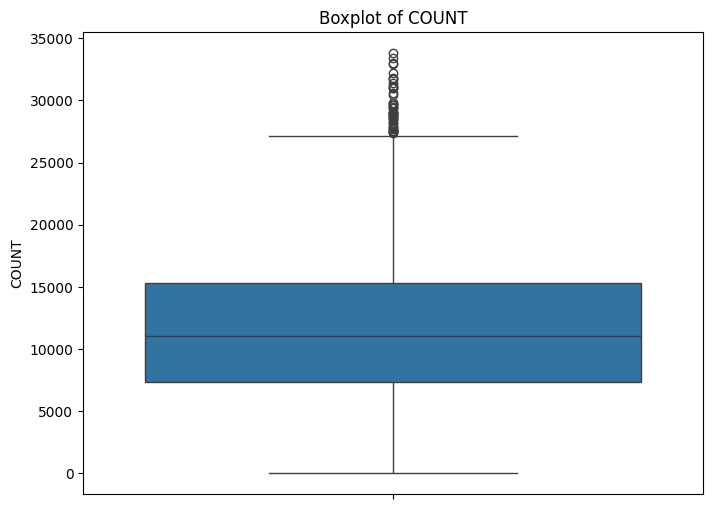

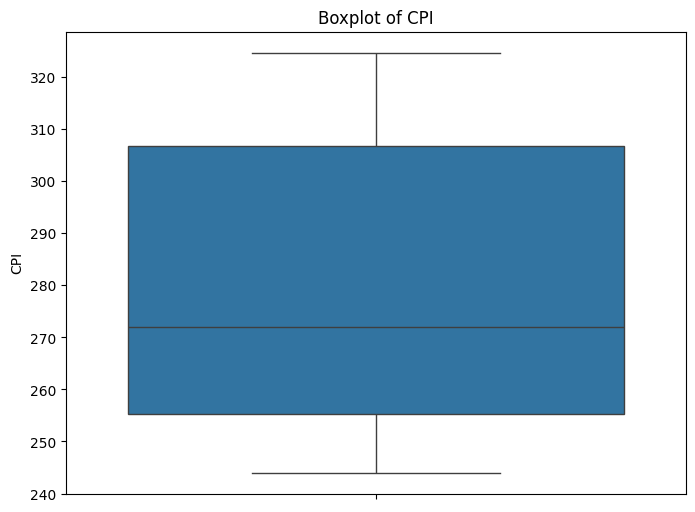

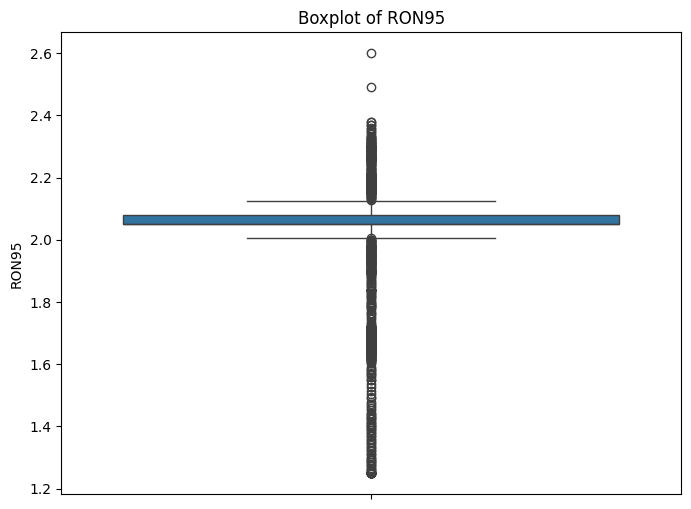

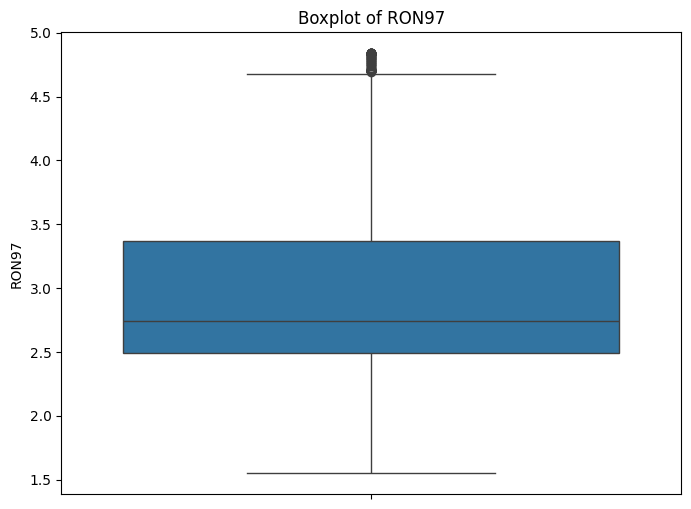

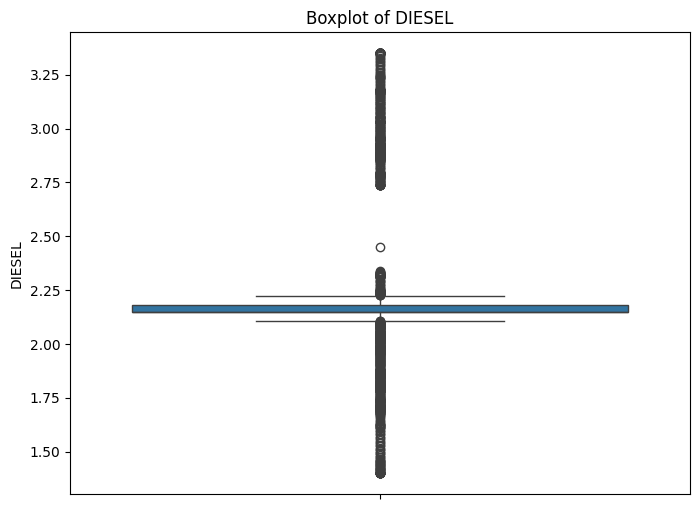

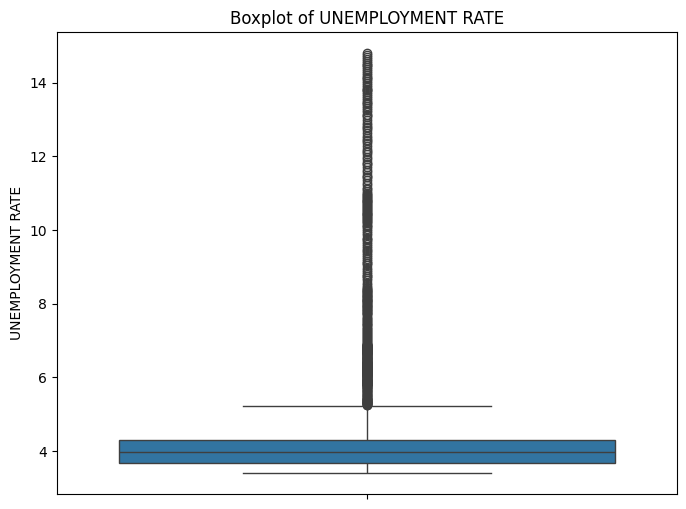

In [35]:
# Check for outliers using boxplots for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

##remove or not? the outliers

##EDA

(1) Descriptive statistics

In [36]:
data.describe()

,COUNT,CPI,RON95,RON97,DIESEL,UNEMPLOYMENT RATE
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000
mean,11662.666069,279.516306,2.032931,2.913795,2.243960,4.553551
std,6036.072251,26.871479,0.171449,0.639960,0.365867,1.804563
min,12.000000,244.004000,1.250000,1.550000,1.400000,3.400000
25%,7352.000000,255.274581,2.050000,2.490000,2.150000,3.683333
50%,11026.571429,271.965000,2.050000,2.741429,2.150000,3.986667
75%,15306.714286,306.736065,2.080000,3.370000,2.180000,4.306452
max,33805.000000,324.683197,2.600000,4.840000,3.350000,14.800000


(2) Correlation Heatmap

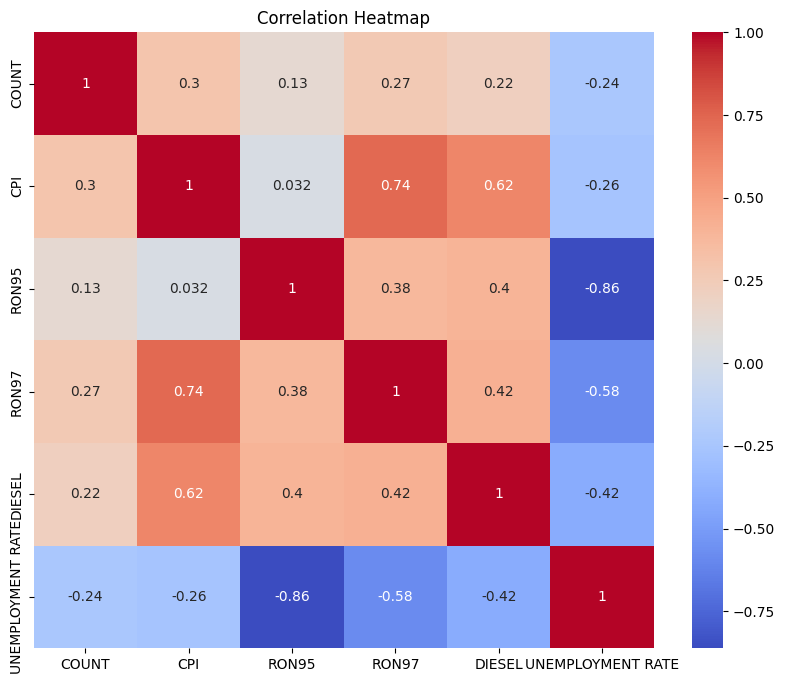

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

(3) Data Distribution

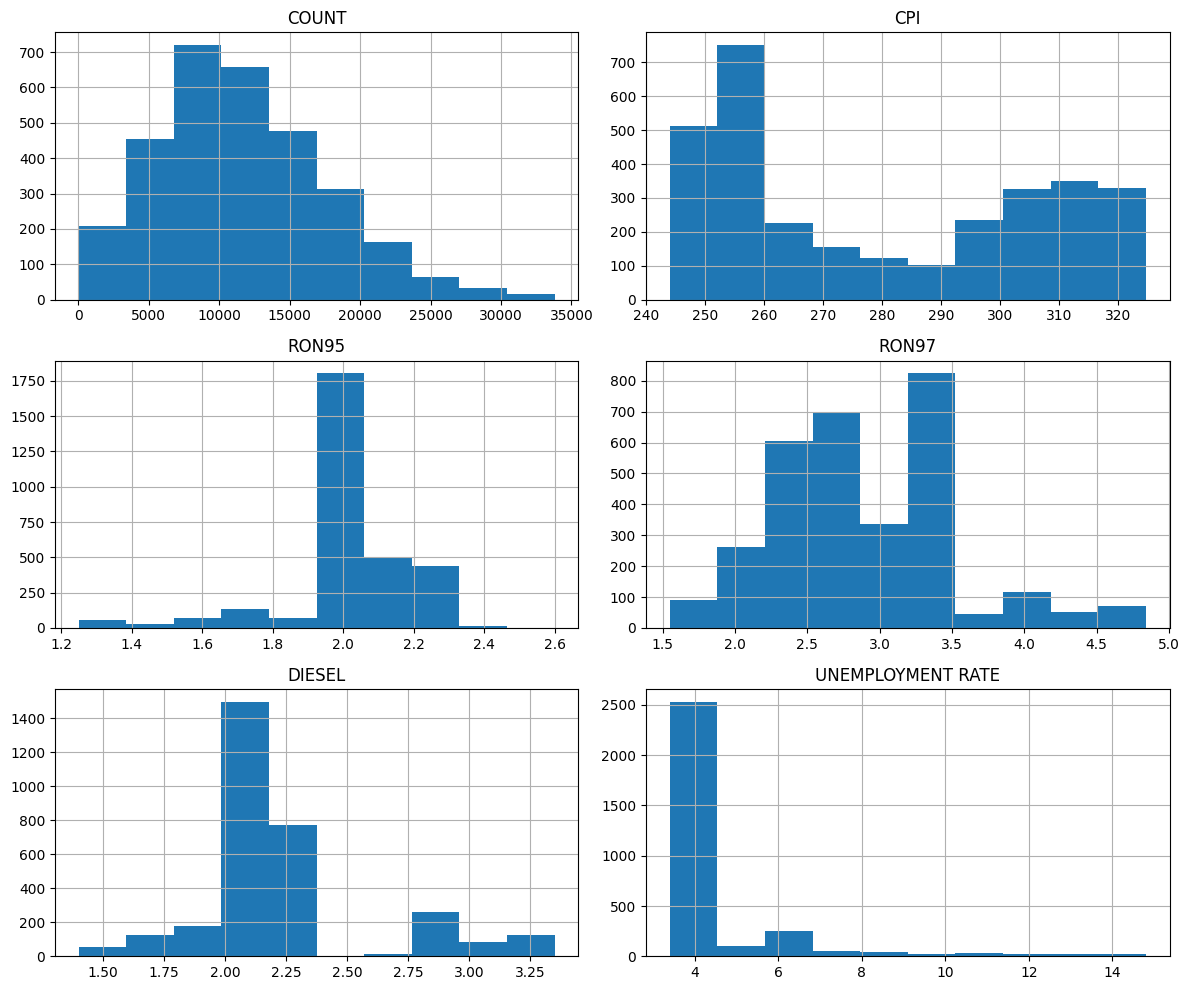

In [38]:
# Data distribution histogram
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

(4) Scatter plots: count vs each independent variable

Purpose: Check linear / non-linear relationships

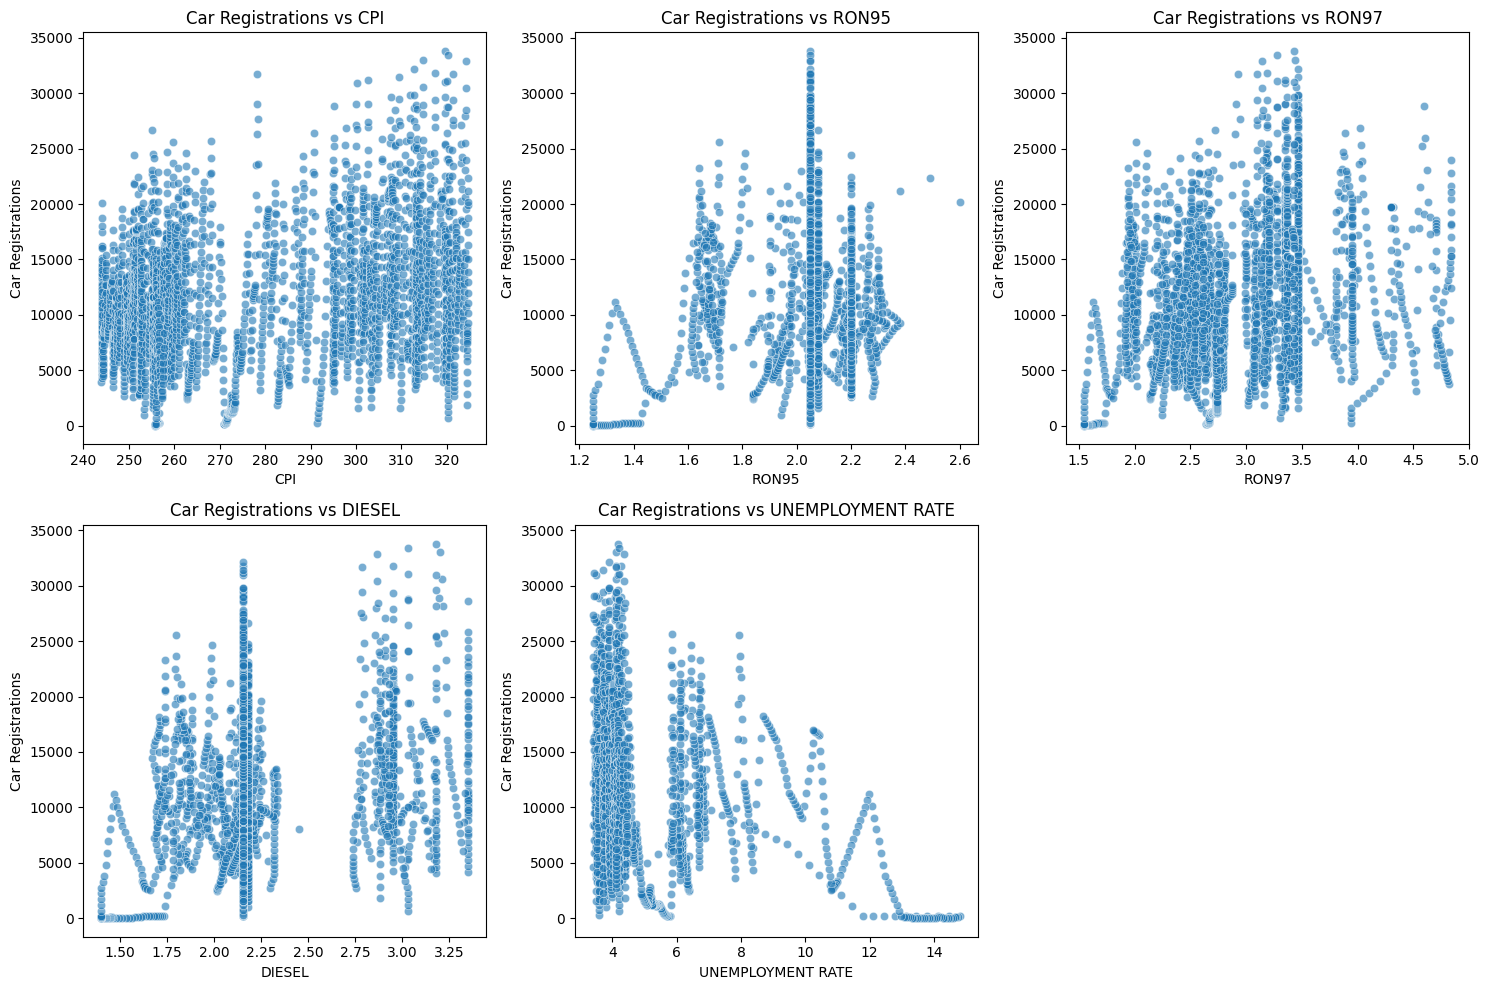

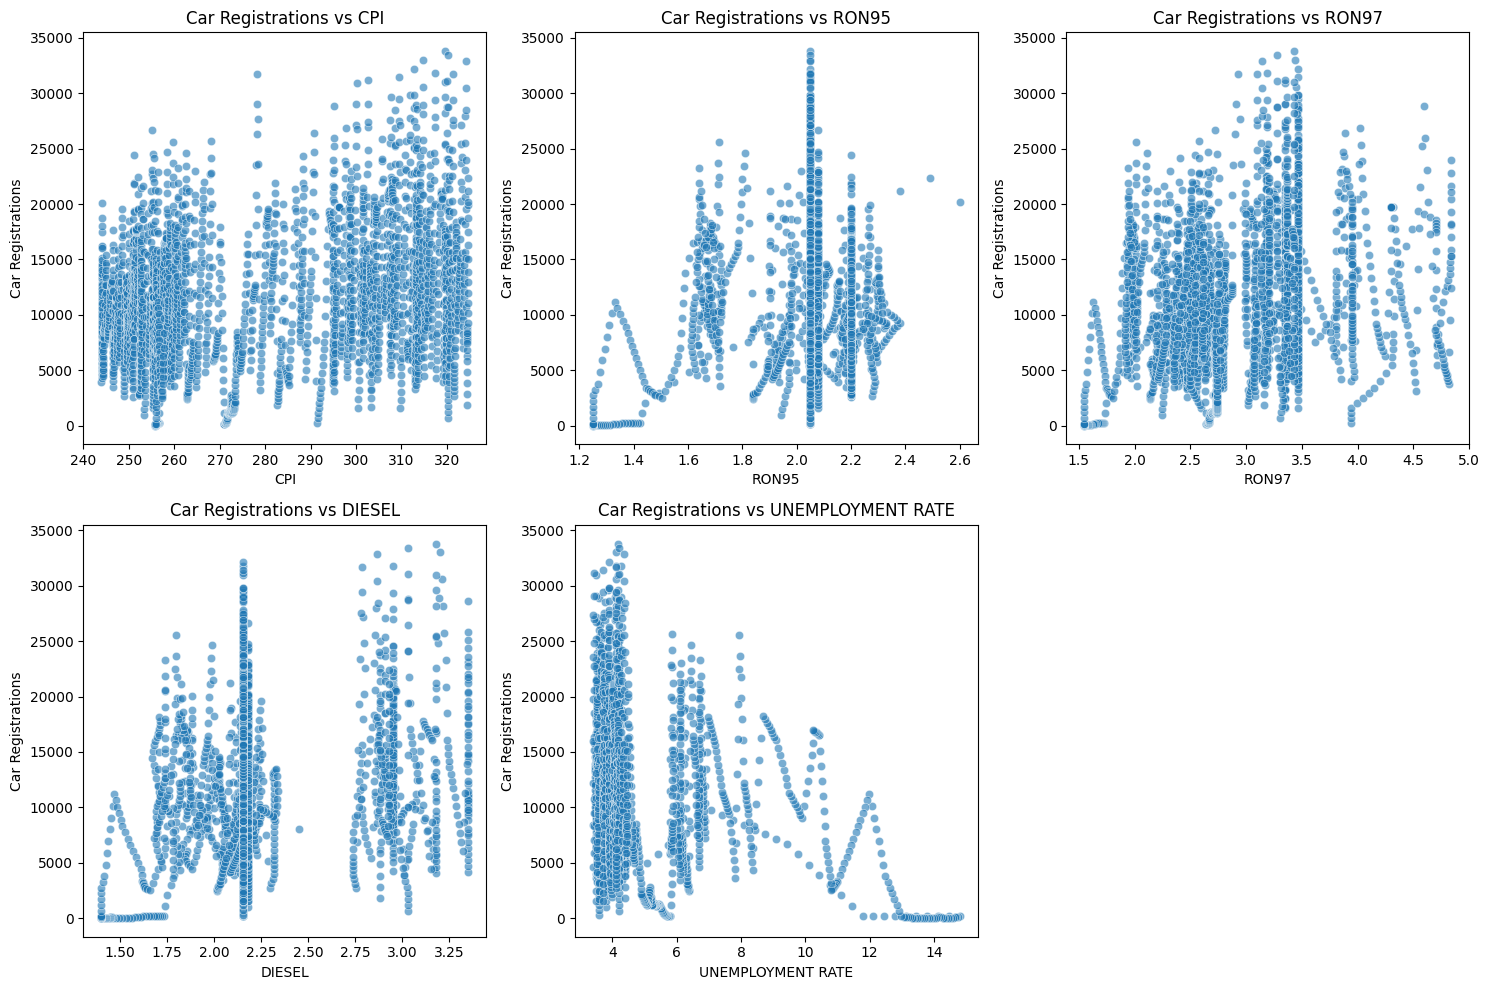

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['CPI', 'RON95', 'RON97', 'DIESEL', 'UNEMPLOYMENT RATE']

plt.figure(figsize=(15,10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[col], y=data['COUNT'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Car Registrations')
    plt.title(f'Car Registrations vs {col}')

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

features = ['CPI', 'RON95', 'RON97', 'DIESEL', 'UNEMPLOYMENT RATE']

plt.figure(figsize=(15,10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[col], y=data['COUNT'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Car Registrations')
    plt.title(f'Car Registrations vs {col}')

plt.tight_layout()
plt.show()


(5) Regression (trend) plots

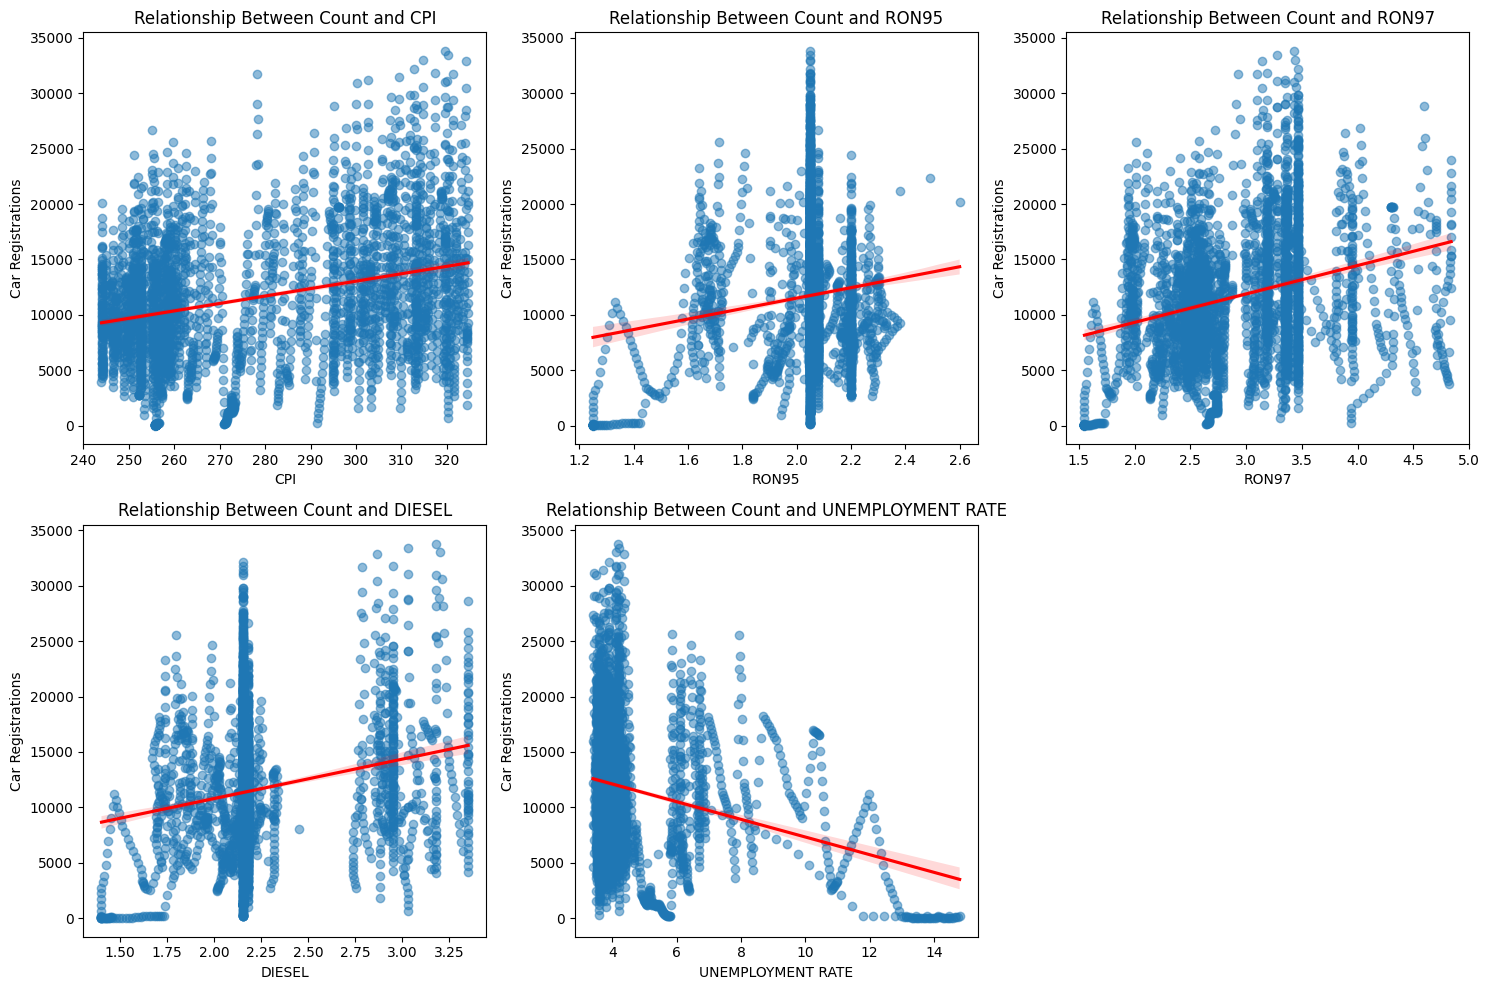

In [44]:
plt.figure(figsize=(15,10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(
        x=data[col],
        y=data['COUNT'],
        scatter_kws={'alpha':0.5},
        line_kws={'color':'red'}
    )
    plt.xlabel(col)
    plt.ylabel('Car Registrations')
    plt.title(f'Relationship Between Count and {col}')

plt.tight_layout()
plt.show()


(6) Pairplot (compact summary)

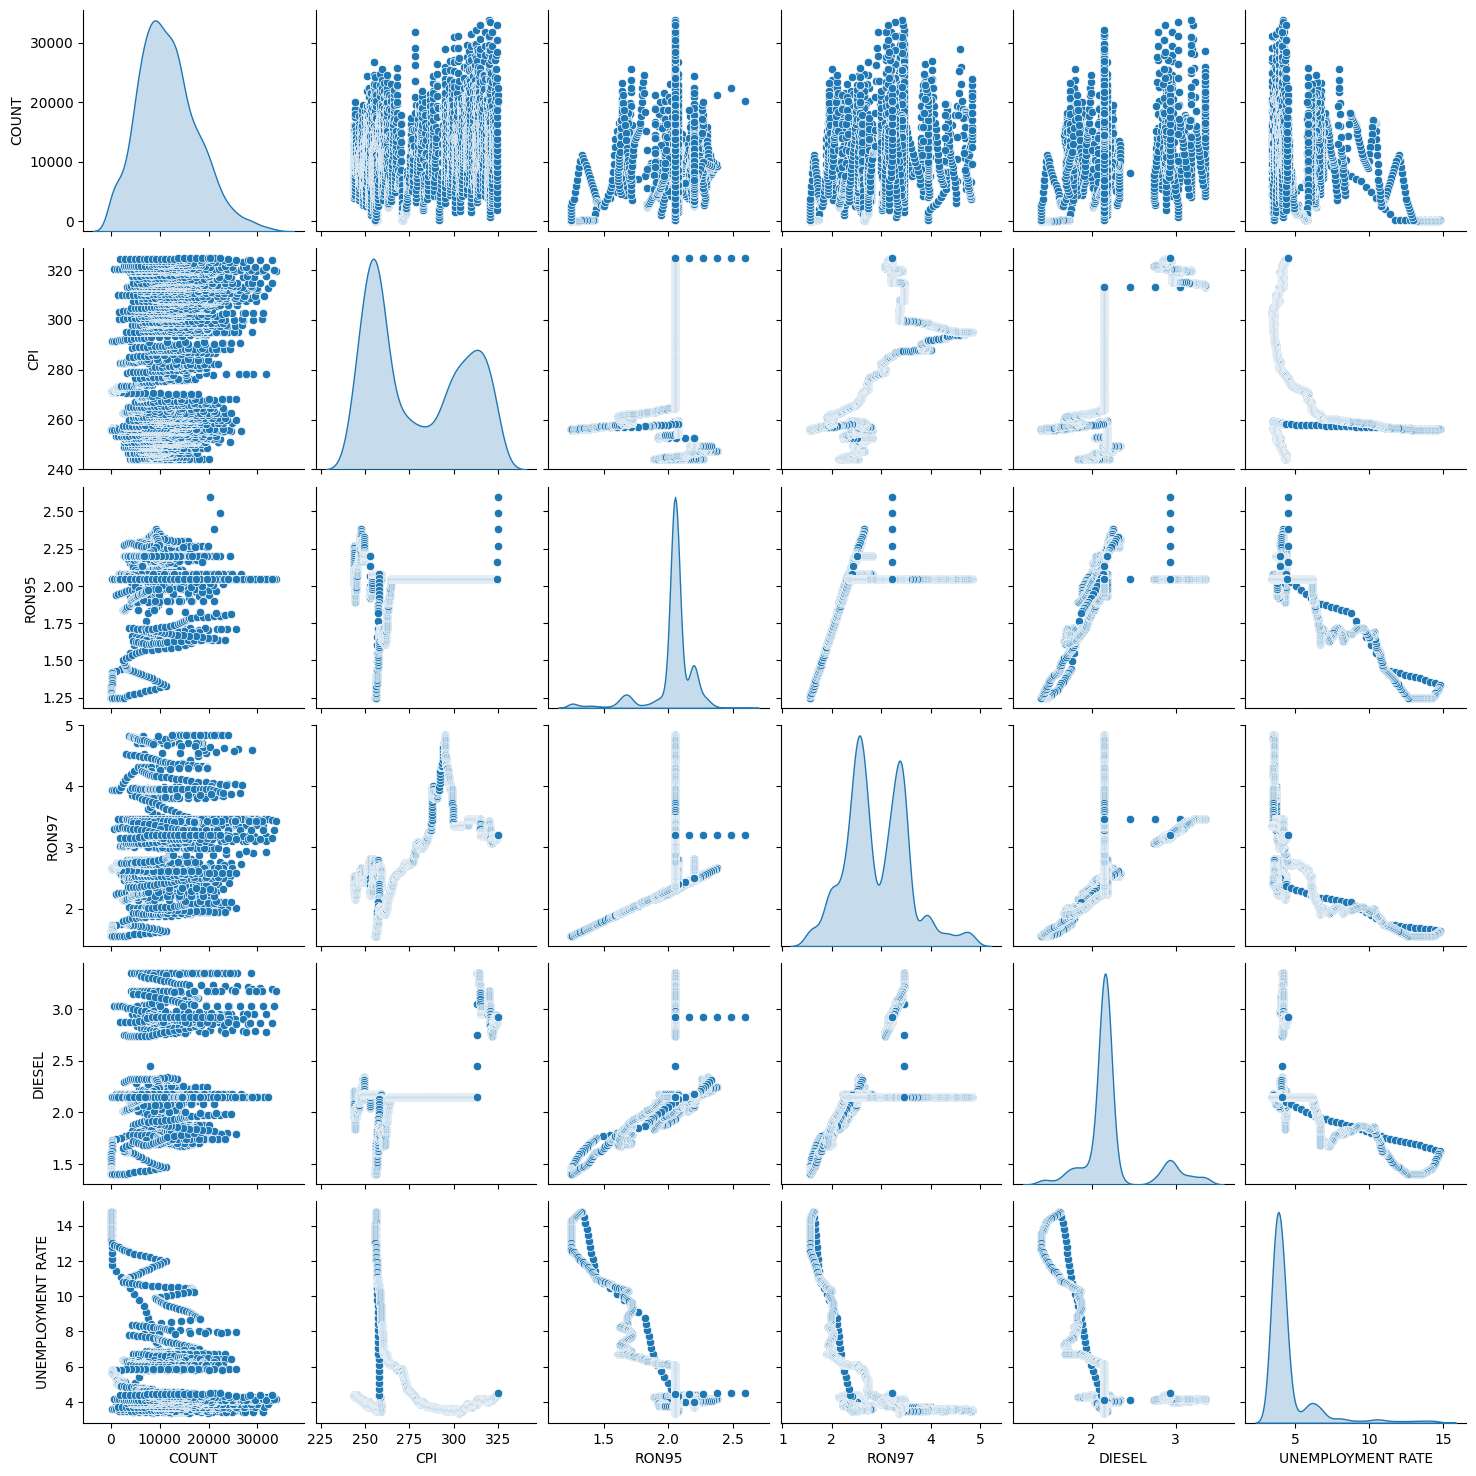

In [49]:
sns.pairplot(
    data[['COUNT','CPI','RON95','RON97','DIESEL','UNEMPLOYMENT RATE']],
    diag_kind='kde'
)
plt.show()


##feature selection

output: car registered

Pearson's feature selection method

In [50]:
# Redefine Xn and yn based on available numerical columns
# Assuming 'car registered' is the target variable (yn) and others are input features (Xn)
Xn = data[['RON95', 'RON97', 'DIESEL', 'CPI', 'UNEMPLOYMENT RATE']]
yn = data['COUNT']

# Pearson's method for numerical with p-values
from scipy.stats import pearsonr
import pandas as pd

pearson_results = []
for feature in Xn.columns:
    corr, p_value = pearsonr(Xn[feature], yn)
    pearson_results.append({'Feature': feature, 'Correlation': corr, 'p-value': p_value})

pearson_results_df = pd.DataFrame(pearson_results).sort_values(by='p-value')
display(pearson_results_df)

,Feature,Correlation,p-value
3,CPI,0.298406,6.893727e-65
1,RON97,0.272032,8.235037e-54
4,UNEMPLOYMENT RATE,-0.238249,2.519225e-41
2,DIESEL,0.215466,6.144365e-34
0,RON95,0.134083,6.268908e-14


##check duplicate data

In [51]:
# Checking Duplicate Data
data.duplicated().sum()

np.int64(0)

new data frame: consist of 2 variables only

In [52]:
# Define significant features only
X = data[['RON97', 'DIESEL', 'RON95', 'CPI', 'UNEMPLOYMENT RATE']]
y = data['COUNT']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#feature scaling

In [53]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The choices of machine learning algorithms:


*   XGBoost
*   CatBoost
*   KNN
*   Random Forest
*   decision tree
*   Gradient Boosting



Gradient Boosting Regressor (sklearn)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr_model.fit(X_train, y_train)

# Make predictions on the test set
gbr_pred = gbr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_gbr = mean_absolute_error(y_test, gbr_pred)
print(f"Gradient Boosting Mean Absolute Error: {mae_gbr:.4f}")


Gradient Boosting Mean Absolute Error: 3372.7458


decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, dt_pred)
print(f"Decision Tree Regressor Mean Absolute Error: {mae_dt:.4f}")

Decision Tree Regressor Mean Absolute Error: 1351.3131


KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN Regressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
knn_pred = knn_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, knn_pred)
print(f"KNN Regressor Mean Absolute Error: {mae_knn:.4f}")

KNN Regressor Mean Absolute Error: 1594.6882


xgboost

In [56]:
# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
print(f"XGBoost Mean Absolute Error: {mae_xgb:.4f}")

XGBoost Mean Absolute Error: 1731.3992


catboost

In [57]:
# Initialize and train the CatBoost Regressor model
cb_model = CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to suppress output during training
cb_model.fit(X_train, y_train)

# Make predictions on the test set
cb_pred = cb_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_cb = mean_absolute_error(y_test, cb_pred)
print(f"CatBoost Mean Absolute Error: {mae_cb:.4f}")

CatBoost Mean Absolute Error: 2449.3506


random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest Mean Absolute Error: {mae_rf:.4f}")


Random Forest Mean Absolute Error: 982.1895


# **Randomized Search CV Tuning**

gradient booster

In [82]:
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# -----------------------------
# Step 0: Define input features (Xn) and target (yn)
# -----------------------------
Xn = data[['RON95', 'RON97', 'DIESEL', 'CPI', 'UNEMPLOYMENT RATE']]
yn = data['COUNT']  # target variable

# -----------------------------
# Step 1: Split the data into training and testing sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

# -----------------------------
# Step 2: Initialize the Gradient Boosting Regressor
# -----------------------------
gbr_model = GradientBoostingRegressor(random_state=42)

# -----------------------------
# Step 3: Fit the original model (baseline MAE) and measure training time
# -----------------------------
start_time = time.time()
gbr_model.fit(X_train, y_train)
end_time = time.time()
training_time_gbr_original = end_time - start_time

mae_gbr_original = mean_absolute_error(y_test, gbr_model.predict(X_test))

# -----------------------------
# Step 4: Define parameter grid for RandomizedSearchCV
# -----------------------------
param_gbr = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# -----------------------------
# Step 5: Initialize RandomizedSearchCV
# -----------------------------
rs_gbr = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_gbr,
    n_iter=25,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# -----------------------------
# Step 6: Fit RandomizedSearchCV to training data and measure training time
# -----------------------------
start_time = time.time()
rs_gbr.fit(X_train, y_train)
end_time = time.time()
training_time_gbr_tuned = end_time - start_time

# -----------------------------
# Step 7: Get the best model and make predictions
# -----------------------------
best_gbr_model = rs_gbr.best_estimator_
best_gbr_pred = best_gbr_model.predict(X_test)

# -----------------------------
# Step 8: Evaluate and print results
# -----------------------------
mae_gbr_best = mean_absolute_error(y_test, best_gbr_pred)

print(f"Original Gradient Boosting MAE: {mae_gbr_original:.4f}")
print(f"Training Time (Original Model): {training_time_gbr_original:.2f} s")
print(f"Updated Gradient Boosting MAE after tuning: {mae_gbr_best:.4f}")
print(f"Training Time (Tuned Model): {training_time_gbr_tuned:.2f} s")
print(f"Best Parameters found: {rs_gbr.best_params_}")
print(f"Best Negative Mean Squared Error: {rs_gbr.best_score_:.4f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Original Gradient Boosting MAE: 3619.1530
Training Time (Original Model): 0.68 s
Updated Gradient Boosting MAE after tuning: 1188.3248
Training Time (Tuned Model): 143.75 s
Best Parameters found: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.2}
Best Negative Mean Squared Error: -4242734.4396


decision tree

In [81]:
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# -----------------------------
# Step 0: Ensure X_train, X_test, y_train, y_test are defined
# -----------------------------
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

# -----------------------------
# Step 1: Initialize the Decision Tree Regressor model
# -----------------------------
dt_model = DecisionTreeRegressor(random_state=42)

# -----------------------------
# Step 2: Fit the original Decision Tree (baseline MAE) and measure training time
# -----------------------------
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
training_time_dt_original = end_time - start_time

mae_dt_original = mean_absolute_error(y_test, dt_model.predict(X_test))

# -----------------------------
# Step 3: Define the parameter grid for RandomizedSearchCV
# -----------------------------
param_dt = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100]
}

# -----------------------------
# Step 4: Initialize RandomizedSearchCV
# -----------------------------
rs_dt = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=param_dt,
    n_iter=25,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# -----------------------------
# Step 5: Fit RandomizedSearchCV to the training data and measure training time
# -----------------------------
start_time = time.time()
rs_dt.fit(X_train, y_train)
end_time = time.time()
training_time_dt_tuned = end_time - start_time

# -----------------------------
# Step 6: Get the best model and make predictions
# -----------------------------
best_dt_model = rs_dt.best_estimator_
best_dt_pred = best_dt_model.predict(X_test)

# -----------------------------
# Step 7: Evaluate and print results
# -----------------------------
mae_dt_best = mean_absolute_error(y_test, best_dt_pred)

print(f"Decision Tree Model Original MAE : {mae_dt_original:.4f}")
print(f"Training Time (Original Model): {training_time_dt_original:.2f} s")
print(f"Updated Decision Tree Model MAE after tuning: {mae_dt_best:.4f}")
print(f"Training Time (Tuned Model): {training_time_dt_tuned:.2f} s")
print(f"Best Parameters found: {rs_dt.best_params_}")
print(f"Best Negative Mean Squared Error: {rs_dt.best_score_:.4f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Decision Tree Model Original MAE : 1349.5772
Training Time (Original Model): 0.03 s
Updated Decision Tree Model MAE after tuning: 2217.9408
Training Time (Tuned Model): 1.30 s
Best Parameters found: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': None}
Best Negative Mean Squared Error: -13365115.8548


KNN

In [80]:
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# -----------------------------
# Step 0: Make sure X_train_scaled, X_test_scaled, y_train, y_test are defined
# -----------------------------

# -----------------------------
# Step 1: Initialize the KNN Regressor
# -----------------------------
knn_model = KNeighborsRegressor()

# -----------------------------
# Step 2: Fit the original KNN (baseline MAE) and measure training time
# -----------------------------
start_time = time.time()
knn_model.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_knn_original = end_time - start_time

mae_knn_original = mean_absolute_error(y_test, knn_model.predict(X_test_scaled))

# -----------------------------
# Step 3: Define the parameter grid for RandomizedSearchCV
# -----------------------------
param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 = Manhattan, 2 = Euclidean
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# -----------------------------
# Step 4: Initialize RandomizedSearchCV
# -----------------------------
rs_knn = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=param_knn,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# -----------------------------
# Step 5: Fit RandomizedSearchCV to the scaled training data and measure training time
# -----------------------------
start_time = time.time()
rs_knn.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_knn_tuned = end_time - start_time

# -----------------------------
# Step 6: Get the best model and make predictions
# -----------------------------
best_knn_model = rs_knn.best_estimator_
best_knn_pred = best_knn_model.predict(X_test_scaled)

# -----------------------------
# Step 7: Evaluate and print results
# -----------------------------
mae_knn_best = mean_absolute_error(y_test, best_knn_pred)

print(f"KNN Model Original MAE : {mae_knn_original:.4f}")
print(f"Training Time (Original Model): {training_time_knn_original:.2f} s")
print(f"Updated KNN Model MAE after tuning: {mae_knn_best:.4f}")
print(f"Training Time (Tuned Model): {training_time_knn_tuned:.2f} s")
print(f"Best Parameters found: {rs_knn.best_params_}")
print(f"Best Negative Mean Squared Error: {rs_knn.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNN Model Original MAE : 1594.6882
Training Time (Original Model): 0.00 s
Updated KNN Model MAE after tuning: 1060.5966
Training Time (Tuned Model): 0.61 s
Best Parameters found: {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'manhattan'}
Best Negative Mean Squared Error: -5360062.0653


XGBoost

In [79]:
import time
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# -----------------------------
# Step 0: Ensure X_train, X_test, y_train, y_test are defined
# -----------------------------

# -----------------------------
# Step 1: Initialize the XGBoost Regressor (original model)
# -----------------------------
xgb_model = xgb.XGBRegressor(random_state=42)

# -----------------------------
# Step 2: Fit the original XGBoost model and measure training time
# -----------------------------
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
training_time_xgb_original = end_time - start_time

mae_xgb = mean_absolute_error(y_test, xgb_model.predict(X_test))

# -----------------------------
# Step 3: Define the parameter grid for RandomizedSearchCV
# -----------------------------
param_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# -----------------------------
# Step 4: Initialize RandomizedSearchCV for XGBoost
# -----------------------------
rs_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_distributions=param_xgb,
    n_iter=25,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# -----------------------------
# Step 5: Fit RandomizedSearchCV to the training data and measure training time
# -----------------------------
start_time = time.time()
rs_xgb.fit(X_train, y_train)
end_time = time.time()
training_time_xgb_tuned = end_time - start_time

# -----------------------------
# Step 6: Get the best model and make predictions
# -----------------------------
best_xgb_model = rs_xgb.best_estimator_
best_xgb_pred = best_xgb_model.predict(X_test)

# -----------------------------
# Step 7: Evaluate and print results
# -----------------------------
mae_best_xgb = mean_absolute_error(y_test, best_xgb_pred)

print(f"XGBoost Model Original MAE : {mae_xgb:.4f}")
print(f"Training Time (Original Model): {training_time_xgb_original:.2f} s")
print(f"Updated XGBoost Model MAE after tuning: {mae_best_xgb:.4f}")
print(f"Training Time (Tuned Model): {training_time_xgb_tuned:.2f} s")
print(f"Best Parameters found: {rs_xgb.best_params_}")
print(f"Best Negative Mean Squared Error: {rs_xgb.best_score_:.4f}")


XGBoost Model Original MAE : 1731.8080
Training Time (Original Model): 0.09 s
Updated XGBoost Model MAE after tuning: 1583.9484
Training Time (Tuned Model): 28.17 s
Best Parameters found: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Negative Mean Squared Error: -8187656.1943


catboost

In [78]:
import time
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# -----------------------------
# Step 0: Ensure X_train, X_test, y_train, y_test are defined
# -----------------------------

# -----------------------------
# Step 1: Initialize the CatBoost Regressor (original model)
# -----------------------------
cb_model = CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress output

# -----------------------------
# Step 2: Fit the original CatBoost model and measure training time
# -----------------------------
start_time = time.time()
cb_model.fit(X_train, y_train)
end_time = time.time()
training_time_cb_original = end_time - start_time

mae_cb = mean_absolute_error(y_test, cb_model.predict(X_test))

# -----------------------------
# Step 3: Define the parameter grid for RandomizedSearchCV
# -----------------------------
param_cb = {
    'iterations': [100, 200, 300, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128]
}

# -----------------------------
# Step 4: Initialize RandomizedSearchCV for CatBoost
# -----------------------------
rs_cb = RandomizedSearchCV(
    estimator=CatBoostRegressor(random_state=42, verbose=0),
    param_distributions=param_cb,
    n_iter=25,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# -----------------------------
# Step 5: Fit RandomizedSearchCV to the training data and measure training time
# -----------------------------
start_time = time.time()
rs_cb.fit(X_train, y_train)
end_time = time.time()
training_time_cb_tuned = end_time - start_time

# -----------------------------
# Step 6: Get the best model and make predictions
# -----------------------------
best_cb_model = rs_cb.best_estimator_
best_cb_pred = best_cb_model.predict(X_test)

# -----------------------------
# Step 7: Evaluate and print results
# -----------------------------
mae_best_cb = mean_absolute_error(y_test, best_cb_pred)

print(f"CatBoost Model Original MAE : {mae_cb:.4f}")
print(f"Training Time (Original Model): {training_time_cb_original:.2f} s")
print(f"Updated CatBoost Model MAE after tuning: {mae_best_cb:.4f}")
print(f"Training Time (Tuned Model): {training_time_cb_tuned:.2f} s")
print(f"Best Parameters found: {rs_cb.best_params_}")
print(f"Best Negative Mean Squared Error: {rs_cb.best_score_:.4f}")


CatBoost Model Original MAE : 2414.8004
Training Time (Original Model): 5.40 s
Updated CatBoost Model MAE after tuning: 1844.1886
Training Time (Tuned Model): 136.40 s
Best Parameters found: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 10, 'border_count': 128}
Best Negative Mean Squared Error: -9921884.4670


random forest

In [77]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# -----------------------------
# Step 0: Ensure X_train, X_test, y_train, y_test are defined
# -----------------------------

# -----------------------------
# Step 1: Initialize the Random Forest Regressor
# -----------------------------
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# -----------------------------
# Step 2: Fit the original Random Forest (baseline MAE) and measure training time
# -----------------------------
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
training_time_rf_original = end_time - start_time

mae_rf_original = mean_absolute_error(y_test, rf_model.predict(X_test))

# -----------------------------
# Step 3: Define the parameter grid for RandomizedSearchCV
# -----------------------------
param_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# -----------------------------
# Step 4: Initialize RandomizedSearchCV
# -----------------------------
rs_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_rf,
    n_iter=25,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# -----------------------------
# Step 5: Fit RandomizedSearchCV to the training data and measure training time
# -----------------------------
start_time = time.time()
rs_rf.fit(X_train, y_train)
end_time = time.time()
training_time_rf_tuned = end_time - start_time

# -----------------------------
# Step 6: Get the best model and make predictions
# -----------------------------
best_rf_model = rs_rf.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

# -----------------------------
# Step 7: Evaluate and print results
# -----------------------------
mae_rf_best = mean_absolute_error(y_test, best_rf_pred)

print(f"Random Forest Model Original MAE : {mae_rf_original:.4f}")
print(f"Training Time (Original Model): {training_time_rf_original:.2f} s")
print(f"Updated Random Forest Model MAE after tuning: {mae_rf_best:.4f}")
print(f"Training Time (Tuned Model): {training_time_rf_tuned:.2f} s")
print(f"Best Parameters found: {rs_rf.best_params_}")
print(f"Best Negative Mean Squared Error: {rs_rf.best_score_:.4f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Random Forest Model Original MAE : 983.4882
Training Time (Original Model): 1.57 s
Updated Random Forest Model MAE after tuning: 1254.5830
Training Time (Tuned Model): 81.46 s
Best Parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Negative Mean Squared Error: -5063672.2236


#model evaluation

In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Dictionary to store results
# -----------------------------
regression_results = {}

# -----------------------------
# Models to evaluate
# Each tuple: (best_model, predictions, training_time)
# Make sure you have defined: best_xgb_model, best_xgb_pred, training_time_xgb, etc.
# -----------------------------
# Only include models you have already defined
models_to_evaluate = {
    'XGBoost': (best_xgb_model, best_xgb_pred, training_time_xgb_tuned),
    'CatBoost': (best_cb_model, best_cb_pred, training_time_cb_tuned),
    'GradientBoosting': (best_gbr_model, best_gbr_pred, training_time_gbr_tuned),
    'RandomForest': (best_rf_model, best_rf_pred, training_time_rf_tuned),
    'DecisionTree': (best_dt_model, best_dt_pred, training_time_dt_tuned),
    'KNN': (best_knn_model, best_knn_pred, training_time_knn_tuned)
}


print("--- Final Model Evaluation Results (Regression Metrics) ---")

# -----------------------------
# Evaluate each model
# -----------------------------
for model_name, (model_obj, predictions, train_time) in models_to_evaluate.items():
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    regression_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'Training Time (s)': train_time
    }

    print(f"\n### {model_name} ###")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Training Time (s): {train_time:.2f}")

# -----------------------------
# Summary table
# -----------------------------
results_df = pd.DataFrame(regression_results).T
display(results_df.sort_values(by='R-squared', ascending=False))


--- Final Model Evaluation Results (Regression Metrics) ---

### XGBoost ###
MAE: 1583.9484
MSE: 5651113.1914
RMSE: 2377.2070
R-squared: 0.8332
Training Time (s): 28.17

### CatBoost ###
MAE: 1844.1886
MSE: 8238639.7708
RMSE: 2870.3031
R-squared: 0.7568
Training Time (s): 136.40

### GradientBoosting ###
MAE: 1188.3248
MSE: 2958732.7660
RMSE: 1720.0967
R-squared: 0.9127
Training Time (s): 143.75

### RandomForest ###
MAE: 1254.5830
MSE: 3713936.3628
RMSE: 1927.1576
R-squared: 0.8904
Training Time (s): 81.46

### DecisionTree ###
MAE: 2217.9408
MSE: 10872063.9898
RMSE: 3297.2813
R-squared: 0.6790
Training Time (s): 1.30

### KNN ###
MAE: 1060.5966
MSE: 3169948.2444
RMSE: 1780.4348
R-squared: 0.9064
Training Time (s): 0.61


,MAE,MSE,RMSE,R-squared,Training Time (s)
GradientBoosting,1188.324808,2.958733e+06,1720.096732,0.912652,143.752219
KNN,1060.596554,3.169948e+06,1780.434847,0.906417,0.610534
RandomForest,1254.582971,3.713936e+06,1927.157586,0.890357,81.461427
XGBoost,1583.948374,5.651113e+06,2377.207015,0.833168,28.173690
CatBoost,1844.188647,8.238640e+06,2870.303080,0.756778,136.402243
DecisionTree,2217.940830,1.087206e+07,3297.281303,0.679034,1.295053


In [86]:
import joblib

# -----------------------------
# Save the best model
# -----------------------------
joblib.dump(best_gbr_model, "best_model_gbr.pkl")
print("Gradient Boosting model saved as 'best_model_gbr.pkl'.")

# -----------------------------
# Save default values for missing features
# -----------------------------
DEFAULTS = {
    "RON95": Xn["RON95"].mean(),
    "RON97": Xn["RON97"].mean(),
    "DIESEL": Xn["DIESEL"].mean(),
    "CPI": Xn["CPI"].mean(),
    "UNEMPLOYMENT RATE": Xn["UNEMPLOYMENT RATE"].mean()
}

joblib.dump(DEFAULTS, "defaults.pkl")
print("Default values saved as 'defaults.pkl'.")


Gradient Boosting model saved as 'best_model_gbr.pkl'.
Default values saved as 'defaults.pkl'.


In [87]:
# Load model and defaults later
best_model = joblib.load("best_model_gbr.pkl")
defaults = joblib.load("defaults.pkl")

# Make prediction on new data
import pandas as pd
new_data = pd.DataFrame([{
    "RON95": 2.05,
    "RON97": 2.30,
    "DIESEL": 2.10,
    "CPI": defaults["CPI"],                # use default if unknown
    "UNEMPLOYMENT RATE": defaults["UNEMPLOYMENT RATE"]
}])

prediction = best_model.predict(new_data)
print("Predicted COUNT:", prediction[0])


Predicted COUNT: 9255.123361081178


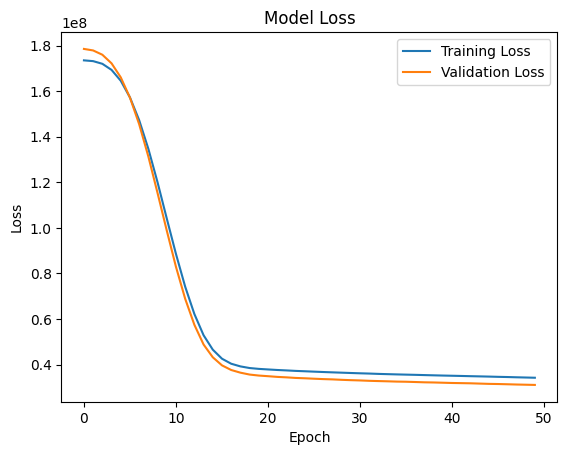

In [88]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()